In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df=pd.read_csv('tennis.csv')

In [3]:
def convert_yes_no (txt):
    if 'yes' in txt:
        return 1
    else:
        return 0

In [4]:
df.windy = df.windy.astype(int)
df.play=df.play.apply(convert_yes_no)

In [6]:
df=pd.get_dummies(df,dtype='int')
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,False,False,True,False,True,False,True,False
1,1,0,False,False,True,False,True,False,True,False
2,0,1,True,False,False,False,True,False,True,False
3,0,1,False,True,False,False,False,True,True,False
4,0,1,False,True,False,True,False,False,False,True
5,1,0,False,True,False,True,False,False,False,True
6,1,1,True,False,False,True,False,False,False,True
7,0,0,False,False,True,False,False,True,True,False
8,0,1,False,False,True,True,False,False,False,True
9,0,1,False,True,False,False,False,True,False,True


In [7]:
x_train=df.iloc[:,df.columns!='play']
x_train

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,False,False,True,False,True,False,True,False
1,1,False,False,True,False,True,False,True,False
2,0,True,False,False,False,True,False,True,False
3,0,False,True,False,False,False,True,True,False
4,0,False,True,False,True,False,False,False,True
5,1,False,True,False,True,False,False,False,True
6,1,True,False,False,True,False,False,False,True
7,0,False,False,True,False,False,True,True,False
8,0,False,False,True,True,False,False,False,True
9,0,False,True,False,False,False,True,False,True


In [8]:
y_train=df.play
y_train

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [9]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
x_train.columns

Index(['windy', 'outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'temp_cool', 'temp_hot', 'temp_mild', 'humidity_high',
       'humidity_normal'],
      dtype='object')

In [11]:
df.columns[1]

'play'

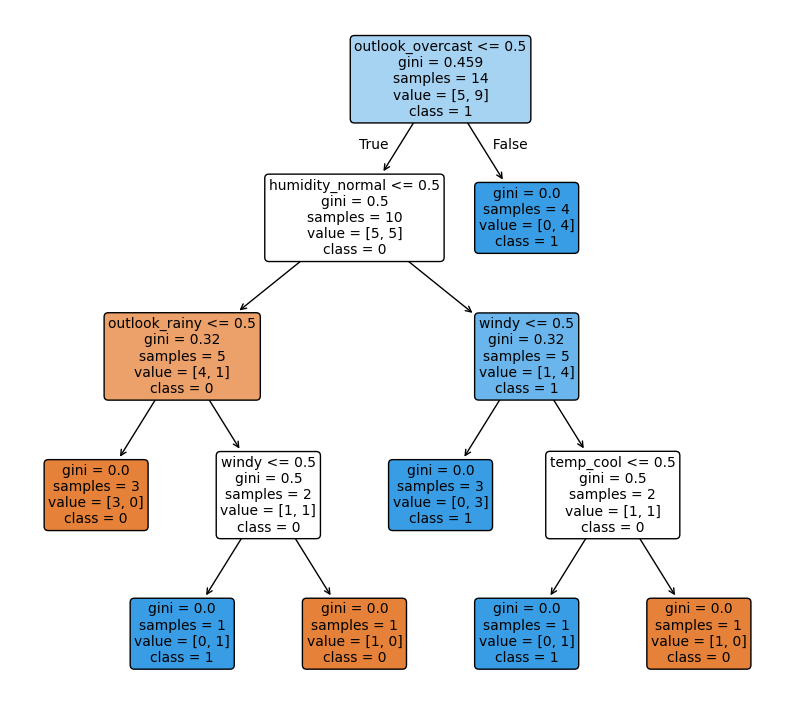

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(x_train, y_train)  
plt.figure(figsize=(10, 9))
plot_tree(
    model,
    feature_names=x_train.columns,
    class_names=model.classes_.astype(str),  # or provide a list of class names
    fontsize=10,
    rounded=True,
    filled=True
)
plt.show()
